# 4b. Model Development for Decision Tree

## A360 MDK interface

In [1]:
a360ai

<A360 AI Interface for project: use-case-logistics>

In [2]:
# Get default data repo
DATAREPO_LIST = a360ai.list_datarepos()
DATAREPO = DATAREPO_LIST['name'][0]
DATAREPO

'use-case-logistics'

### Import Necessary Packages

In [3]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
)
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

##  Set Default Data Repo and load data

In [4]:
a360ai.set_default_datarepo(DATAREPO)


In [5]:
a360ai.list_datasets()


,base_name,extension,size
1,X.parquet,parquet,3213246.0
2,data_traffic_congestion_2020.csv,csv,36377405.0
3,y.parquet,parquet,1503289.0


### Load Data

In [6]:
X = a360ai.load_dataset("X.parquet")
y = a360ai.load_dataset("y.parquet")

### Split the Train and Test Data 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [8]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (194357, 143)
Shape of test set :  (83297, 143)
Percentage of classes in training set:
Data_prediction
0                  0.500116
1                  0.499884
dtype: float64
Percentage of classes in test set:
Data_prediction
1                  0.50027
0                  0.49973
dtype: float64


Earlier we coverted 0 to being smooth and 1 being congested <br> Above we see that 70% of the data is in the Training set and 30% of the data is in the test set

### Defining functions to get the model performance metrics and build the confusion matrix 

In [9]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [10]:
#defining function to build the confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree Model 

In [11]:
model_dt = a360ai.get_or_create_model(model_name=f"logistics_dt")


In [12]:
experiment = model_dt.get_or_create_experiment(
    experiment_name = f"logitics_dtree_model",
    model_flavor = "sklearn",
    enable_drift_monitoring=True,
    train_features=X_train,
    train_target=y_train,
    feature_names=list(X.columns),
    data_exploration_file="/home/jovyan/EDA.ipynb",
    data_preparation_file="/home/jovyan/Preprocessing-2.ipynb",
    model_training_file="/home/jovyan/model_development_dt.ipynb",
)


//-- Experiment Loaded --//
Model Name: logistics_dt
Experiment Name: logitics_dtree_model
Final Run Id: a4d5575d-971c-4785-b6ce-b74b275876cc
Model Flavor: sklearn
Input Signature: Fastest_Route_Distance float, Fastest_Route_Time float, month big_integer, day_of_month big_integer, day_of_year big_integer, week_of_year big_integer, year big_integer, is_wknd big_integer, is_month_start big_integer, is_month_end float, Destination_Location_7th_ave small_integer, Destination_Location_9th_avenue small_integer, Destination_Location_Al_hateem_palace small_integer, Destination_Location_D_chowk small_integer, Destination_Location_IJP road small_integer, Destination_Location_Jamia Masjid Bilal small_integer, Destination_Location_air_university small_integer, Destination_Location_alliedschool_g10 small_integer, Destination_Location_awan_shop small_integer, Destination_Location_bar_bq_tonight small_integer, Destination_Location_capital_gymkhana small_integer, Destination_Location_castpro_engineer

In [13]:
experiments = model_dt.list_experiments()
experiments


,id,bestRun,model_id,experiment_name,best_run_id,model_flavor,input_signature,output_signature,data_exploration_file,data_preparation_file,model_training_file,baseline,train_shape,model_name,updated_at
0,f90295ad-eac6-410f-8ae4-1a96564f6851,"{'id': 'a4d5575d-971c-4785-b6ce-b74b275876cc',...",10c947b2-6140-4c76-a45d-365014b05eef,logitics_dtree_model,a4d5575d-971c-4785-b6ce-b74b275876cc,sklearn,"Fastest_Route_Distance float, Fastest_Route_Ti...",Data_prediction big_integer,/home/jovyan/EDA.ipynb,/home/jovyan/Preprocessing-2.ipynb,/home/jovyan/model_development_dt.ipynb,{'Fastest_Route_Distance': {'mean': 1362.05770...,[143],logistics_dt,2022-06-28 21:41


In [14]:
count = 1
for n in [2,4,6,8,10,None]:
    with experiment.run_experiment() as run:
    
        hyperparams = {
            "max_depth": n            
        }
    
        dt = DecisionTreeClassifier(**hyperparams)
        dt.fit(X_train, y_train)
        train_score = dt.score(X_train, y_train)
        test_score = dt.score(X_test, y_test)

        metrics = {
            "train_score": train_score,
            "test_score": test_score,
        }

        run.log_metrics(metrics)
        run.log_hyperparameters(hyperparams)
        run.log_model(dt)
        
        print("Run " + str(count) + " Complete!")
        count = count + 1 

Run 1 Complete!
Run 2 Complete!
Run 3 Complete!
Run 4 Complete!
Run 5 Complete!
Run 6 Complete!


In [15]:
runs_dt = experiment.list_runs()
runs_dt

,id,dataset,artifact_paths,metric_test_score,metric_train_score,hyperparameter_max_depth,metadata_run_time
0,bfcf1d75-3967-4b51-8921-cdf7c1858a0a,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': '51868cd2-d613-429e-877e-d46600d69f8e'...,0.768515,0.769234,2.0,0.880736
1,42bf8c43-65a8-4b6e-9649-dfe76944af74,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': '91a7d991-636a-4248-86c8-259a27231e2f'...,0.913178,0.913273,4.0,0.995223
2,55fea0ab-0bfa-4f03-afe6-39dff4022619,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': '52db0190-f92c-4d2f-8290-08cc803fbfd6'...,0.946000,0.946706,6.0,1.127794
3,144f8e65-544a-4059-a9a7-1dba0d360489,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': 'ced04826-a027-4559-b354-ca03924aad28'...,0.981560,0.981668,8.0,1.164279
4,077e54e9-78ed-418d-b081-facb8a7876e0,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': '843cc1d6-ac06-4012-84e4-b1fd96035bcf'...,0.993169,0.993234,10.0,1.101340
5,a4d5575d-971c-4785-b6ce-b74b275876cc,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': '8c5938af-932d-4105-81a3-f925dc1ea05e'...,0.994261,0.994726,NaN,1.078278
6,03f452f1-6a70-456a-a650-79489f21f06c,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': 'dfd982e8-f92a-4aea-a58b-df7ed55eae5c'...,0.768515,0.769234,2.0,0.794610
7,c50374bd-5f57-4637-b72c-b0f698655d5c,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': 'd76568d7-6409-4cff-9a9c-2f501e7ee4fc'...,0.913178,0.913273,4.0,0.982060
8,d96bf3c1-ca7a-4cdc-8f83-f38ed6097a5e,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': '6863dd31-c0fc-43bc-9928-598cef1e8878'...,0.946000,0.946706,6.0,0.946429
9,eb17570e-2090-4a7e-a1f0-463dd17e2d7c,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': '145a7a29-31c6-4590-ad6a-bb85c024ca9d'...,0.981560,0.981668,8.0,1.151566


In [16]:
runs_dt.sort_values('metric_test_score',ascending=False)


,id,dataset,artifact_paths,metric_test_score,metric_train_score,hyperparameter_max_depth,metadata_run_time
17,4208654b-37a8-4696-b7d8-c7fd093ae7d6,ec867e42-1df4-4f00-8200-621eafeb7e6f,[{'id': '56d44ca2-ba26-48b7-ba92-c51c861e7eef'...,0.994261,0.994726,NaN,1.071116
5,a4d5575d-971c-4785-b6ce-b74b275876cc,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': '8c5938af-932d-4105-81a3-f925dc1ea05e'...,0.994261,0.994726,NaN,1.078278
11,2be80893-fac3-4a3d-b0d5-affac9477fa4,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': '916e3a15-4eff-44fd-9324-3ddff1328a9a'...,0.994261,0.994726,NaN,1.233444
10,ce05b4b3-4834-435f-8348-5481cc448ba4,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': '411272bb-b5a9-4f45-be5b-1621084c72da'...,0.993169,0.993234,10.0,1.110439
16,42b11135-1174-4789-98ab-69a2445d963a,ec867e42-1df4-4f00-8200-621eafeb7e6f,[{'id': 'd5b6760e-c5d6-49b1-bcd6-a0a7dc1e4166'...,0.993169,0.993234,10.0,1.046737
4,077e54e9-78ed-418d-b081-facb8a7876e0,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': '843cc1d6-ac06-4012-84e4-b1fd96035bcf'...,0.993169,0.993234,10.0,1.101340
15,ed02c05e-9bf5-48bd-95f0-c6b5bfbf5373,ec867e42-1df4-4f00-8200-621eafeb7e6f,[{'id': 'cfbe1b65-fdc8-4beb-9ff9-d557bf92efea'...,0.981560,0.981668,8.0,1.067043
9,eb17570e-2090-4a7e-a1f0-463dd17e2d7c,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': '145a7a29-31c6-4590-ad6a-bb85c024ca9d'...,0.981560,0.981668,8.0,1.151566
3,144f8e65-544a-4059-a9a7-1dba0d360489,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': 'ced04826-a027-4559-b354-ca03924aad28'...,0.981560,0.981668,8.0,1.164279
8,d96bf3c1-ca7a-4cdc-8f83-f38ed6097a5e,1f03566a-fade-4373-acb7-20a55d3e75c0,[{'id': '6863dd31-c0fc-43bc-9928-598cef1e8878'...,0.946000,0.946706,6.0,0.946429


## Get the best run from model experiments

In [17]:
best_run_id = runs_dt.sort_values("metric_test_score", ascending=False).id.values[0]
best_run_id

'4208654b-37a8-4696-b7d8-c7fd093ae7d6'

In [18]:
model_dt.set_final_run(experiment, best_run_id)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.994726  0.995337    0.99412  0.994728
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.994261  0.995248   0.993294  0.99427


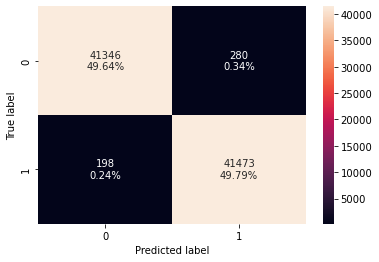

In [19]:
d_tree_model_train_perf=model_performance_classification_sklearn(dt, X_train,y_train)
print("Training performance:\n", d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(dt, X_test,y_test)
print("Testing performance:\n", d_tree_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(dt,X_test,y_test)



## Feature Importance

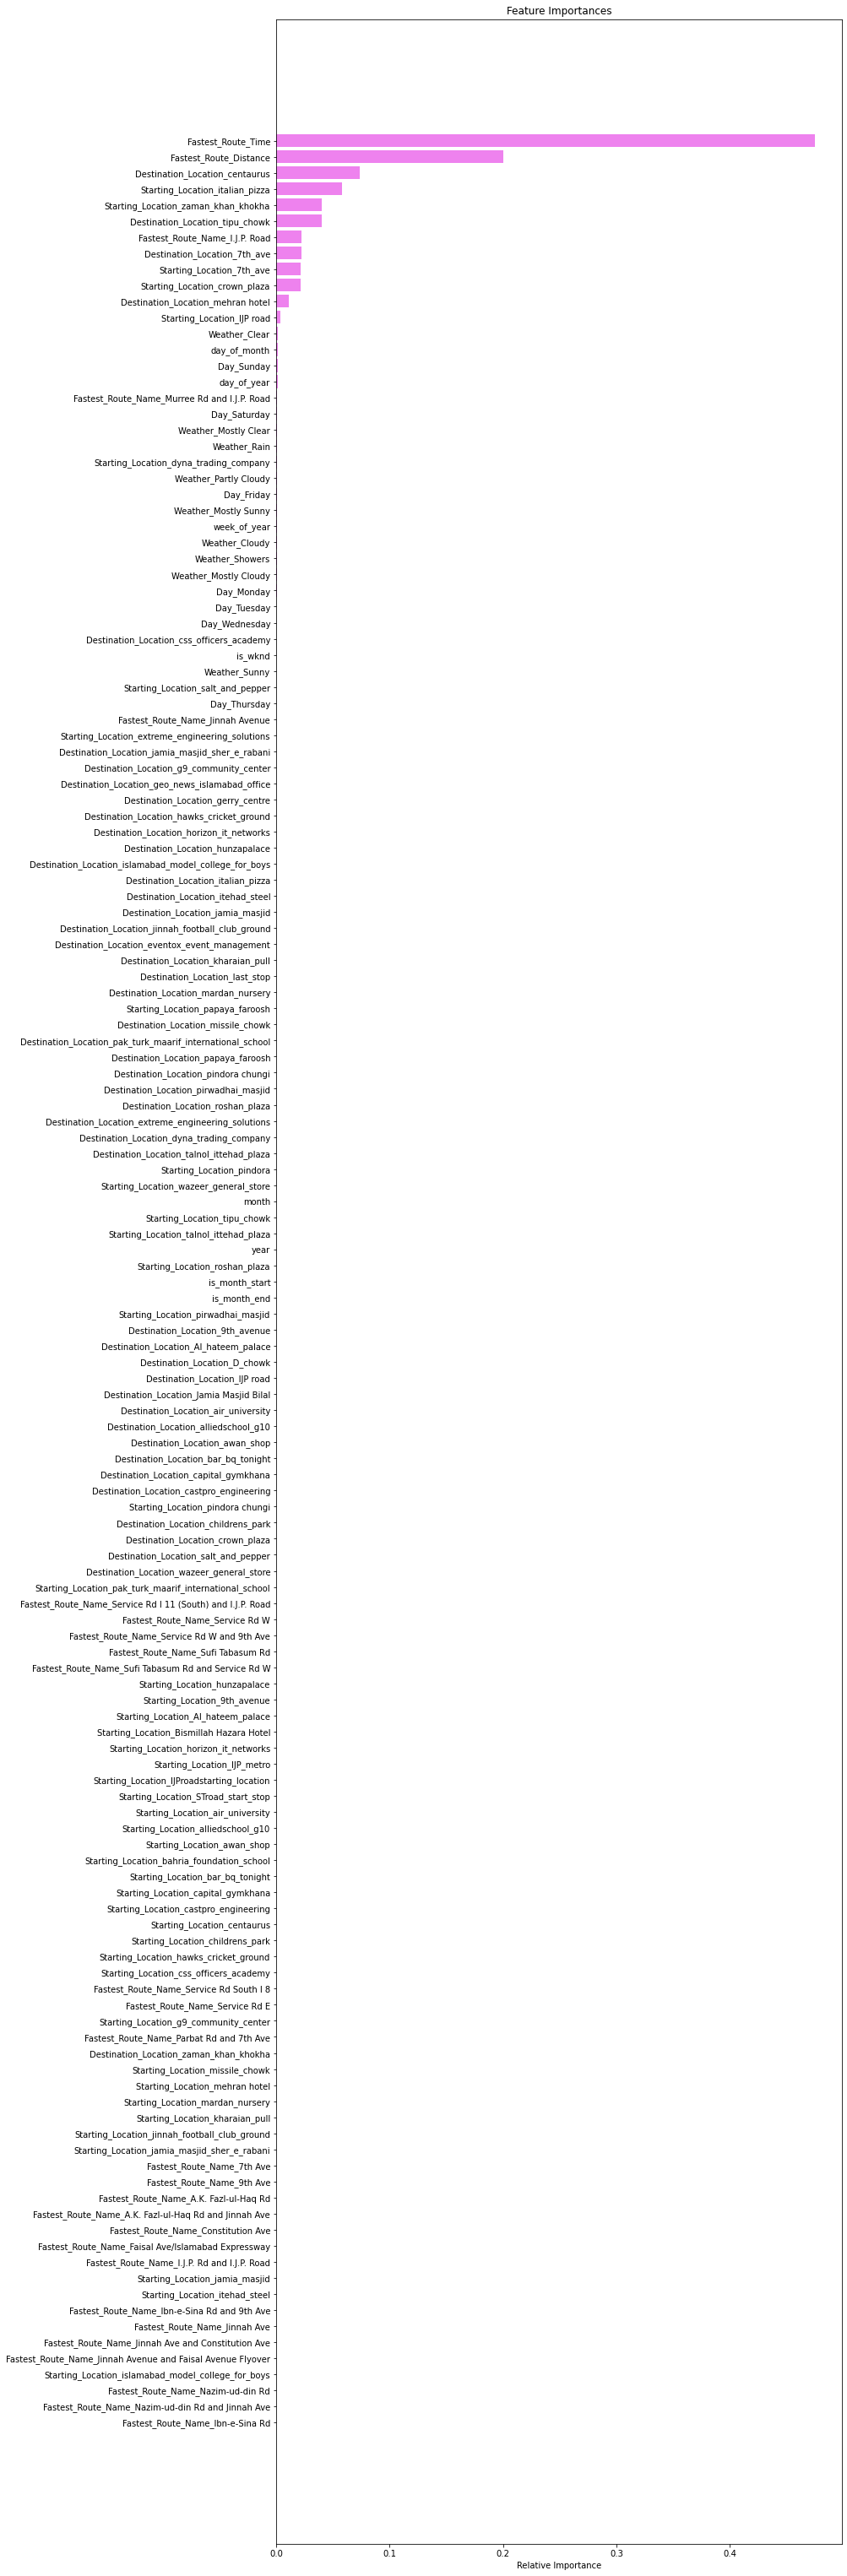

In [20]:
feature_names = X_train.columns
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,55))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Over here we obsereve the Most Important metric to be the Fastest_Route_Time followed by Fastest_Route_Distance. This tells us that these two features according to both the graph above. Also, the staring location and the destination location are important features as well.

## Bussiness Insights

The Five most important features to build the model to predict the traffic status are as follows: 
1. Fastest Route Time 
2. Fastest Route Distance 
3. Destination Location 
4. Starting Location 
5. Day of the Week 
With these features being given, current traffic situation can be predicted accurately.